<a href="https://colab.research.google.com/github/Uluc/data_science_and_analytics/blob/main/pandas_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
import numpy as np

## Task 1

#### Create a dataframe from a numpy random int array of shape (10, 5). Name the columns as 'A'-'E'.

In [ ]:
df = pd.DataFrame(np.random.randint(10, size=(10,5)), columns=['A','B','C','D','E'])
df

,A,B,C,D,E
0,7,9,9,9,6
1,0,0,6,6,6
2,7,1,9,9,4
3,1,9,2,8,8
4,6,8,0,5,7
5,0,3,3,7,4
6,7,0,4,1,4
7,9,3,9,5,1
8,9,5,6,7,9
9,3,4,3,7,8


#### Calculate mean, max, min for each column

In [ ]:
print(df.mean())
print(df.max())
print(df.min())

A    4.9
B    4.2
C    5.1
D    6.4
E    5.7
dtype: float64
A    9
B    9
C    9
D    9
E    9
dtype: int64
A    0
B    0
C    0
D    1
E    1
dtype: int64


#### Make a new dataframe by substracting mean from each of the columns in the above dataframe

In [ ]:
df2 = pd.DataFrame(df-df.mean())
print(df2)

     A    B    C    D    E
0  2.1  4.8  3.9  2.6  0.3
1 -4.9 -4.2  0.9 -0.4  0.3
2  2.1 -3.2  3.9  2.6 -1.7
3 -3.9  4.8 -3.1  1.6  2.3
4  1.1  3.8 -5.1 -1.4  1.3
5 -4.9 -1.2 -2.1  0.6 -1.7
6  2.1 -4.2 -1.1 -5.4 -1.7
7  4.1 -1.2  3.9 -1.4 -4.7
8  4.1  0.8  0.9  0.6  3.3
9 -1.9 -0.2 -2.1  0.6  2.3


#### Make a new dataframe from the orginal dataframe such that the numbers in the first column is squared.  

In [ ]:
df2 = pd.DataFrame(df**2)
print(df2)

    A   B   C   D   E
0  49  81  81  81  36
1   0   0  36  36  36
2  49   1  81  81  16
3   1  81   4  64  64
4  36  64   0  25  49
5   0   9   9  49  16
6  49   0  16   1  16
7  81   9  81  25   1
8  81  25  36  49  81
9   9  16   9  49  64


## Task 2

### Fill the NaN values in the following dataframe with zero

In [ ]:
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
df = pd.DataFrame(exam_data)
df

,name,score,attempts,qualify
0,Anastasia,12.5,1,yes
1,Dima,9.0,3,no
2,Katherine,16.5,2,yes
3,James,NaN,3,no
4,Emily,9.0,2,no
5,Michael,20.0,3,yes
6,Matthew,14.5,1,yes
7,Laura,NaN,1,no
8,Kevin,8.0,2,no
9,Jonas,19.0,1,yes


In [ ]:
df.fillna(0)

,name,score,attempts,qualify
0,Anastasia,12.5,1,yes
1,Dima,9.0,3,no
2,Katherine,16.5,2,yes
3,James,0.0,3,no
4,Emily,9.0,2,no
5,Michael,20.0,3,yes
6,Matthew,14.5,1,yes
7,Laura,0.0,1,no
8,Kevin,8.0,2,no
9,Jonas,19.0,1,yes


## Task 3

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
births = pd.read_csv(io.BytesIO(uploaded['births.csv']))
births.head()

Saving births.csv to births.csv


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


#### Generate a dataframe for birth data between year 1970 and 1980

In [ ]:
df = births[(births['year'] >= 1970) & (births['year'] <= 1980)]


print(df)

      year  month   day gender  births
768   1970      1   1.0      F    4064
769   1970      1   1.0      M    4308
770   1970      1   2.0      F    4536
771   1970      1   2.0      M    4698
772   1970      1   3.0      F    4398
...    ...    ...   ...    ...     ...
9128  1980     12  30.0      F    5645
9129  1980     12  30.0      M    5958
9130  1980     12  31.0      F    5361
9131  1980     12  31.0      M    5586
9132  1980     12  99.0      F       2

[8365 rows x 5 columns]


#### Use the dataframe generated above and ``groupby`` to show total birth for male and female between year 1970 and 1980 

In [ ]:
df.groupby('gender').sum()

,year,month,day,births
gender,,,,
F,8267268,27276,76554.0,18025534
M,8253415,27259,76071.0,18977072


#### and average daily birth

In [ ]:
df.groupby('gender')['day'].mean()

gender
F    18.288103
M    18.203159
Name: day, dtype: float64

#### Based on the datafrome generated above, make a pivot table showing total birth for month and gender (i.e., your table should have 12 rows corresponding to Jan-Dec and 2 columns corresponding to F and M. Each cell should be the total births in that month across the years for F and M.)

In [ ]:
df.pivot_table('births', index='month', columns='gender', aggfunc=sum)

gender,F,M
month,,
1,1488948,1565932
2,1382905,1452696
3,1501972,1582395
4,1409200,1487212
5,1461556,1547445
6,1452841,1537212
7,1580061,1670045
8,1613564,1697895
9,1589998,1666816


#### Plot the above table as two curves: one for F and one for M. x_axis should be month and label the y_axis as 'Total Births'

Text(0, 0.5, 'Total Births')

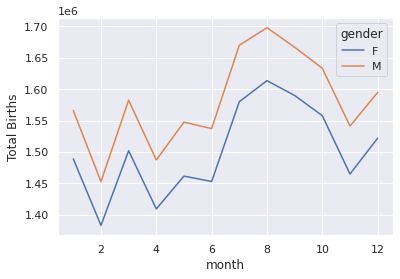

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df.pivot_table('births', index='month', columns='gender', aggfunc=sum).plot()
plt.ylabel('Total Births')

#### In the original table, find the max number of births of boys on a single day and the date that gives the max number.

In [ ]:
x= births[births['gender']=='M']['births'].max()
print(x)
births[births['births'] == x] A /;


199622


,year,month,day,gender,births
15514,2007,8,NaN,M,199622
